In [15]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [87]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import mediapipe as mp

In [88]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [89]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [90]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [91]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness = 1, circle_radius = 1)) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness = 1, circle_radius = 4),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness = 1, circle_radius = 1)) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76),thickness = 1, circle_radius = 4),
                              mp_drawing.DrawingSpec(color=(121,44,250),thickness = 1, circle_radius = 1)) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness = 1, circle_radius = 4),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness = 1, circle_radius = 1))

In [92]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image, results = mediapipe_detection(frame,holistic)
        print(results)
        
        draw_styled_landmarks(image,results)
        
        cv2.imshow("Opencv feed",image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [93]:
results

mediapipe.python.solution_base.SolutionOutputs

In [94]:
draw_landmarks(frame,results)

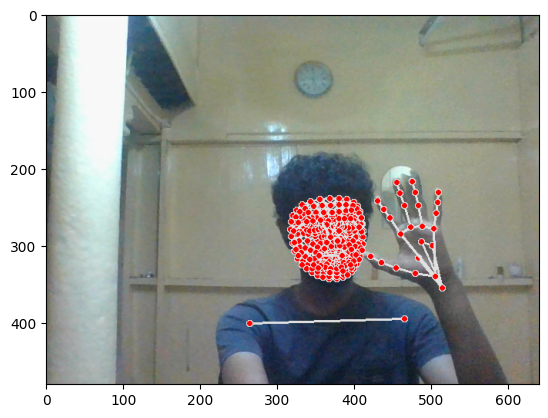

In [95]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [96]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [97]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [98]:
lh

array([ 7.89557576e-01,  7.10016429e-01,  2.54352187e-07,  7.49058366e-01,
        7.01996028e-01, -1.52990604e-02,  7.09732413e-01,  6.86860263e-01,
       -2.46140976e-02,  6.80196226e-01,  6.71782911e-01, -3.30558941e-02,
        6.58239603e-01,  6.55874729e-01, -4.11889106e-02,  7.20007837e-01,
        5.93893230e-01, -1.05454270e-02,  6.97706759e-01,  5.51944971e-01,
       -2.17373110e-02,  6.84382081e-01,  5.27106285e-01, -3.24226767e-02,
        6.73288107e-01,  5.05164385e-01, -4.05261628e-02,  7.40341246e-01,
        5.76737642e-01, -1.31202312e-02,  7.26756990e-01,  5.18206954e-01,
       -2.14219000e-02,  7.18354285e-01,  4.83920485e-01, -2.98755728e-02,
        7.11537004e-01,  4.55386817e-01, -3.65955494e-02,  7.62509048e-01,
        5.73169470e-01, -1.84975695e-02,  7.55532444e-01,  5.17381668e-01,
       -2.82603726e-02,  7.49332130e-01,  4.82551664e-01, -3.62484716e-02,
        7.43124902e-01,  4.53042060e-01, -4.24074344e-02,  7.86014557e-01,
        5.80963910e-01, -

In [99]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
DATA_PATH = os.path.join('MP_Data')

actions = np.array(['hello','thanks','iloveyou'])

no_sequences = 30

sequence_length = 30

In [101]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [102]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
 
    for action in actions:
       
        for sequence in range(no_sequences):
            
            for frame_num in range(sequence_length):

                
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [103]:
cap.release()

In [104]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [105]:
label_map = {label:num for num, label in enumerate(actions)}

In [106]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [133]:
sequences , labels = [] , []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [134]:
np.array(sequences).shape 

(90, 30, 1662)

In [135]:
np.array(labels).shape

(90,)

In [136]:
X = np.array(sequences)

In [137]:
X.shape

(90, 30, 1662)

In [138]:
y = to_categorical(labels).astype(int) 

In [139]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05)

In [141]:
y_test.shape

(5, 3)

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [143]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [144]:
model = Sequential()
model.add(LSTM(64,return_sequences = True,activation='relu',input_shape = (30,1662)))
model.add(LSTM(128,return_sequences = True,activation = 'relu'))
model.add(LSTM(64,return_sequences = False,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(actions.shape[0],activation = 'softmax'))

In [145]:
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['categorical_accuracy'])

In [185]:
model.fit(X_train,y_train,epochs = 150,callbacks=[tb_callback])

Epoch 1/150
3/3 [==============================] - 5s 539ms/step - loss: 0.2127 - categorical_accuracy: 0.8941
Epoch 2/150
3/3 [==============================] - 2s 490ms/step - loss: 0.5825 - categorical_accuracy: 0.7412
Epoch 3/150
3/3 [==============================] - 1s 470ms/step - loss: 0.6908 - categorical_accuracy: 0.6588
Epoch 4/150
3/3 [==============================] - 1s 496ms/step - loss: 0.6471 - categorical_accuracy: 0.6353
Epoch 5/150
3/3 [==============================] - 2s 576ms/step - loss: 0.4236 - categorical_accuracy: 0.7412
Epoch 6/150
3/3 [==============================] - 1s 427ms/step - loss: 0.4756 - categorical_accuracy: 0.7647
Epoch 7/150
3/3 [==============================] - 1s 453ms/step - loss: 0.3667 - categorical_accuracy: 0.8118
Epoch 8/150
3/3 [==============================] - 1s 441ms/step - loss: 0.4342 - categorical_accuracy: 0.7529
Epoch 9/150
3/3 [==============================] - 1s 419ms/step - loss: 0.3682 - categorical_accuracy: 0.8118
E

In [186]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [187]:
res = model.predict(X_test)

1/1 [==============================] - 0s 389ms/step


In [188]:
actions[np.argmax(res[0])]

'hello'

In [189]:
actions[np.argmax(y_test[0])]

'thanks'

In [190]:
model.save('action.h5')

In [191]:
from tensorflow.keras.models import load_model
model = load_model('action.h5')

In [192]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [193]:
yhat = model.predict(X_test)

1/1 [==============================] - 4s 4s/step


In [194]:
ytrue = np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat,axis = 1).tolist() 

In [195]:
ytrue , yhat

([1, 1, 2, 2, 2], [0, 0, 2, 2, 2])

In [196]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 2],
        [0, 0]],

       [[3, 0],
        [2, 0]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [197]:
accuracy_score(ytrue,yhat)

0.6

In [ ]:

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        

        keypoints = extract_keypoints(results)

        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            
            
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()